# Übung Wacken Zeitreihe (Lösung)

Bitte interpretieren Sie den Datensat zum Wackenkornzert.

Die Daten basieren auf den Angaben aus der Wikipedia. Die genauen Datumsangaben, Monat und Tag, sind geraten. Sie sollen für den Umgang mit Datumswerten sensibilisieren.

In [54]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn = "data/wacken.csv"

df = pd.read_csv(fn)
display(df.head(3))
print('shape: ', df.shape)

,Jahr,Datum,Bands,Teilnehmer,zahlende Besucher,Preis (EUR),Ausverkauft (Tage)
0,1990,8 September,6,800,NaN,6.14,NaN
1,1991,12 September,7,1300,NaN,7.67,NaN
2,1992,22 August,26,3500,NaN,17.90,NaN


shape:  (33, 7)


Erste Rohdaten dank Matplotlib-Funktionalität von Pandas:

<AxesSubplot: >

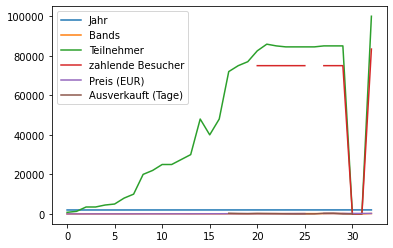

In [55]:
df.plot()

Gewünscht: x-Achse als Zeitachse. 

Zwischenschritte:

* Umwandeln der Felder *Jahr* und *Datum*  in vollständiges Datum.
* Anschließend Umwandeln der neuen Datumsattribute in Index.



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jahr                33 non-null     int64  
 1   Datum               33 non-null     object 
 2   Bands               33 non-null     int64  
 3   Teilnehmer          33 non-null     int64  
 4   zahlende Besucher   13 non-null     float64
 5   Preis (EUR)         32 non-null     float64
 6   Ausverkauft (Tage)  14 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.9+ KB


Ein gültiges Datenformat besteht aus Jahr, Monat und Tag.

Eine Lösung: ` df['Datum'] + ' ' + df['Jahr'].apply(str)`

Hier:

In [57]:
df['Jahr'] = df['Jahr'].astype(str)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jahr                33 non-null     object 
 1   Datum               33 non-null     object 
 2   Bands               33 non-null     int64  
 3   Teilnehmer          33 non-null     int64  
 4   zahlende Besucher   13 non-null     float64
 5   Preis (EUR)         32 non-null     float64
 6   Ausverkauft (Tage)  14 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.9+ KB


In [59]:
df['Date'] =  df['Datum'] + ' ' + df['Jahr']
df.head(3)

,Jahr,Datum,Bands,Teilnehmer,zahlende Besucher,Preis (EUR),Ausverkauft (Tage),Date
0,1990,8 September,6,800,NaN,6.14,NaN,8 September 1990
1,1991,12 September,7,1300,NaN,7.67,NaN,12 September 1991
2,1992,22 August,26,3500,NaN,17.90,NaN,22 August 1992


### Einschub: Zeit-Datentyp

datetime: date, datetime, time, timedelta etc



In [60]:
from datetime import date
from datetime import datetime
from datetime import timedelta

today = date.today()
otherday = date(2022, 1, 1)
otherday_time= datetime(2022,1,1, 13,45,17) #17.3)
otherday_time.isoformat()

'2022-01-01T13:45:17'

In [61]:
# datetime.timedelta(days=0, seconds=0, microseconds=0, 
# milliseconds=0, minutes=0, hours=0, weeks=0)
otherday_time + timedelta(1)
otherday_time + timedelta(3)
otherday_time + timedelta(days = 3, minutes = 20)

datetime.datetime(2022, 1, 4, 14, 5, 17)

In [62]:
otherday_time.strftime("%A %d. %B %Y")

'Saturday 01. January 2022'

In [63]:
otherday_time.strftime("%d %m %y - %Y-%m-%d %H:%M")

'01 01 22 - 2022-01-01 13:45'

In [64]:
datetime.strptime('3.6.2001', '%d.%m.%Y')

datetime.datetime(2001, 6, 3, 0, 0)

### Datumsformate mit Pandas

Intern rechnet Pandas im Format datetime64\[ns\].
Es kennt kein strptime, dafür to_datetime

In [66]:
df.head()

,Jahr,Datum,Bands,Teilnehmer,zahlende Besucher,Preis (EUR),Ausverkauft (Tage),Date
0,1990,8 September,6,800,NaN,6.14,NaN,8 September 1990
1,1991,12 September,7,1300,NaN,7.67,NaN,12 September 1991
2,1992,22 August,26,3500,NaN,17.90,NaN,22 August 1992
3,1993,4 April,32,3500,NaN,23.01,NaN,4 April 1993
4,1994,10 May,29,4500,NaN,19.94,NaN,10 May 1994


In [67]:
df['Date2'] = pd.to_datetime(df['Date'], format='%d %B %Y')
df[['Date','Date2']].head(3)

,Date,Date2
0,8 September 1990,1990-09-08
1,12 September 1991,1991-09-12
2,22 August 1992,1992-08-22


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Jahr                33 non-null     object        
 1   Datum               33 non-null     object        
 2   Bands               33 non-null     int64         
 3   Teilnehmer          33 non-null     int64         
 4   zahlende Besucher   13 non-null     float64       
 5   Preis (EUR)         32 non-null     float64       
 6   Ausverkauft (Tage)  14 non-null     float64       
 7   Date                33 non-null     object        
 8   Date2               33 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.4+ KB


Datenformat in Nanosekunden:

1 ns = 1e-9 sec

64 bit: 2 ** 64 = 

Wie viele Jahre lassen sich in Nanosekunden ausdrücken?

1ns * 2 ** 64 / (1e9 ns * 3600 sec * 24 h * 365 days)

1 * 2 ** 64 / (1e9 * 3600 * 24 * 365)

Bezugspunkt: 1.1.1970

In [69]:
print(f'2**64 Nanosekunden: {2**64:2g}')
print(f'In Jahren: {1 * 2**64 / (10**9 * 3600 * 24 * 365):3g}')


2**64 Nanosekunden: 1.84467e+19
In Jahren: 584.942


In [70]:
df['Date2'] = pd.to_datetime(df['Date']) #, format='%d %B %Y')
df[['Date','Date2']].head(3)

,Date,Date2
0,8 September 1990,1990-09-08
1,12 September 1991,1991-09-12
2,22 August 1992,1992-08-22


In [71]:
# date range

pd.date_range(start = '2001', end = '2002-03-07') #, freq = 'm')

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2002-02-26', '2002-02-27', '2002-02-28', '2002-03-01',
               '2002-03-02', '2002-03-03', '2002-03-04', '2002-03-05',
               '2002-03-06', '2002-03-07'],
              dtype='datetime64[ns]', length=431, freq='D')

In [72]:
df['Date2'][:5]

0   1990-09-08
1   1991-09-12
2   1992-08-22
3   1993-04-04
4   1994-05-10
Name: Date2, dtype: datetime64[ns]

In [73]:
df['Date2'].astype(int)[:5]

0    652752000000000000
1    684633600000000000
2    714441600000000000
3    733881600000000000
4    768528000000000000
Name: Date2, dtype: int64

In [75]:
dg = df.copy()
dg = dg.set_index('Date2')
dg = dg.drop(['Datum', 'Jahr', 'Date'], axis = 1)
dg.head(3)

,Bands,Teilnehmer,zahlende Besucher,Preis (EUR),Ausverkauft (Tage)
Date2,,,,,
1990-09-08,6,800,NaN,6.14,NaN
1991-09-12,7,1300,NaN,7.67,NaN
1992-08-22,26,3500,NaN,17.90,NaN


In [76]:
dh = dg.resample("Y").max() 
#other options
#.mean() 
#resample('10Y').agg('count')

print(dh.shape)
dh.head(3)

(33, 5)


,Bands,Teilnehmer,zahlende Besucher,Preis (EUR),Ausverkauft (Tage)
Date2,,,,,
1990-12-31,6,800,NaN,6.14,NaN
1991-12-31,7,1300,NaN,7.67,NaN
1992-12-31,26,3500,NaN,17.90,NaN


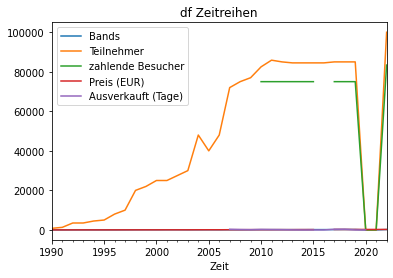

In [77]:
ax = dh.plot()
ax.set_title('df Zeitreihen')
ax.set_xlabel('Zeit');


Beobachungen:

* Datum wird als englische Eingabe (*July*) erwartet. Andere Sprachen sind ebenfalls möglich, abhängig von globaler Einstellung.
* Das Resamplen über ein Jahr mittelt über die Zeit. Eine höhere Zeitauflösung -- genauer Tag der Veranstaltung -- geht dabei verloren.
* dataframe.plot() erzeugt für jede Spalte zusammen mit dem Index eine Zeitreihe.


Fehlende Werte werden mit *NaN* ausgegeben. In vielen Fällen ist die Aussage richtig, erschwert aber Berechunungen wie Mittelwert oder Fehlerbreite.



In [78]:
df = dh.copy()
dh.replace(np.nan,0)
dh.replace(np.nan,0, inplace = True)
dh.head()


,Bands,Teilnehmer,zahlende Besucher,Preis (EUR),Ausverkauft (Tage)
Date2,,,,,
1990-12-31,6,800,0.0,6.14,0.0
1991-12-31,7,1300,0.0,7.67,0.0
1992-12-31,26,3500,0.0,17.90,0.0
1993-12-31,32,3500,0.0,23.01,0.0
1994-12-31,29,4500,0.0,19.94,0.0


In [79]:
df = df.dropna()   # or: df.dropna(inplace = True)
df = df.dropna()     # any: if at leas one rowel == nana
df = df.dropna(how='all') # if all rowel == nan
df = df.dropna(thresh=3)  # if at least 3 rowel == nan
df = df.dropna(subset=['zahlende Besucher']) # check only columx
print(dh.shape, df.shape)

(33, 5) (11, 5)


<AxesSubplot: xlabel='Date2'>

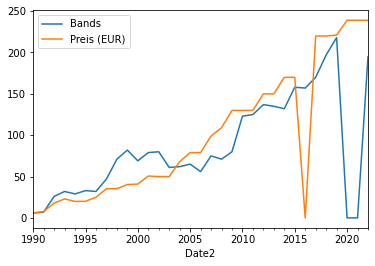

In [80]:
dh[['Bands', 'Preis (EUR)']].plot()

array([[<AxesSubplot: title={'center': 'Bands'}>,
        <AxesSubplot: title={'center': 'Teilnehmer'}>],
       [<AxesSubplot: title={'center': 'zahlende Besucher'}>,
        <AxesSubplot: title={'center': 'Preis (EUR)'}>],
       [<AxesSubplot: title={'center': 'Ausverkauft (Tage)'}>,
        <AxesSubplot: >]], dtype=object)

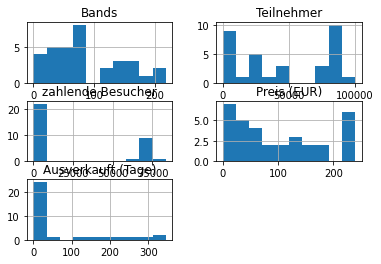

In [81]:
dh.hist()
#plt.show()

## Date format

https://www.programiz.com/python-programming/datetime/strftime

~~~
Code 	Example 	Description
0 	%a 	Sun 	Weekday as locale’s abbreviated name.
1 	%A 	Sunday 	Weekday as locale’s full name.
2 	%w 	0 	Weekday as a decimal number, where 0 is Sunday...
3 	%d 	08 	Day of the month as a zero-padded decimal number.
4 	%-d 	8 	Day of the month as a decimal number. (Platfor...
5 	%b 	Sep 	Month as locale’s abbreviated name.
6 	%B 	September 	Month as locale’s full name.
7 	%m 	09 	Month as a zero-padded decimal number.
8 	%-m 	9 	Month as a decimal number. (Platform specific)
9 	%y 	13 	Year without century as a zero-padded decimal ...
10 	%Y 	2013 	Year with century as a decimal number.
11 	%H 	07 	Hour (24-hour clock) as a zero-padded decimal ...
12 	%-H 	7 	Hour (24-hour clock) as a decimal number. (Pla...
13 	%I 	07 	Hour (12-hour clock) as a zero-padded decimal ...
14 	%-I 	7 	Hour (12-hour clock) as a decimal number. (Pla...
15 	%p 	AM 	Locale’s equivalent of either AM or PM.
16 	%M 	06 	Minute as a zero-padded decimal number.
17 	%-M 	6 	Minute as a decimal number. (Platform specific)
18 	%S 	05 	Second as a zero-padded decimal number.
19 	%-S 	5 	Second as a decimal number. (Platform specific)
20 	%f 	000000 	Microsecond as a decimal number, zero-padded t...
21 	%z 	+0000 	UTC offset in the form ±HHMM[SS[.ffffff]] (emp...
22 	%Z 	UTC 	Time zone name (empty string if the object is ...
23 	%j 	251 	Day of the year as a zero-padded decimal number.
24 	%-j 	251 	Day of the year as a decimal number. (Platform...
25 	%U 	36 	Week number of the year (Sunday as the first d...
26 	%-U 	36 	Week number of the year (Sunday as the first d...
27 	%W 	35 	Week number of the year (Monday as the first d...
28 	%-W 	35 	Week number of the year (Monday as the first d...
29 	%c 	Sun Sep 8 07:06:05 2013 	Locale’s appropriate date and time representat...
30 	%x 	09/08/13 	Locale’s appropriate date representation.
31 	%X 	07:06:05 	Locale’s appropriate time representation.
32 	%% 	% 	A literal '%' character.
~~~